**DETECTRON2:**

---



In [ ]:

!python -m pip install pyyaml==5.1
import sys, os, distutils.core
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))
#-----------------------------------------------------------------------------------------------------------
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)
#-----------------------------------------------------------------------------------------------------------
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
#-----------------------------------------------------------------------------------------------------------


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp310-cp310-linux_x86_64.whl size=44090 sha256=fd39ee0a956ad5353f0df8779c54d1c3b38b9849644223932e394407ac262973
  Stored in directory: /root/.cache/pip/wheels/70/83/31/975b737609aba39a4099d471d5684141c1fdc3404f97e7f68a
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.12.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
flax 0.6.9 requires PyYAML>=5.4.1, but you have pyyaml 5.1 which is incompatibl

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61405 sha256=2829c3b9770d0d480f1c9e8790139176b143f0658c34e700984ff9fbda12dcbc
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=12e5c117f7d7bb42879b412a7329d4

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.0 ; cuda:  cu118
detectron2: 0.6


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

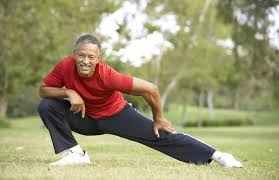

In [ ]:
im = cv2.imread("/content/position1.jpeg")
cv2_imshow(im)

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[06/12 08:08:11 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x/139686956/model_final_5ad38f.pkl ...


model_final_5ad38f.pkl: 491MB [00:11, 42.3MB/s]                           
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
outputs

{'instances': Instances(num_instances=1, image_height=180, image_width=279, fields=[pred_boxes: Boxes(tensor([[ 32.8275,  34.2300, 239.9500, 167.2390]], device='cuda:0')), scores: tensor([0.9980], device='cuda:0'), pred_classes: tensor([0], device='cuda:0'), pred_keypoints: tensor([[[8.5564e+01, 6.1978e+01, 1.4835e+00],
          [9.1861e+01, 5.7484e+01, 5.7021e+00],
          [8.1066e+01, 5.5911e+01, 1.1145e+01],
          [9.8607e+01, 5.8383e+01, 1.3230e+00],
          [7.4319e+01, 5.5013e+01, 1.3252e+00],
          [1.0333e+02, 7.2537e+01, 5.9633e-01],
          [6.5549e+01, 6.6696e+01, 4.1786e-01],
          [1.5101e+02, 8.8714e+01, 1.1804e+00],
          [4.3510e+01, 9.0961e+01, 1.0882e+00],
          [1.5888e+02, 1.1747e+02, 1.6338e+00],
          [6.9372e+01, 9.3432e+01, 1.6314e+00],
          [1.1367e+02, 1.1275e+02, 2.5010e-01],
          [8.4439e+01, 1.2017e+02, 1.9456e-01],
          [1.6562e+02, 1.4061e+02, 2.9552e-01],
          [4.6208e+01, 1.0579e+02, 6.0680e-01],
      

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
outputs['instances'].pred_keypoints

tensor([[[8.5564e+01, 6.1978e+01, 1.4835e+00],
         [9.1861e+01, 5.7484e+01, 5.7021e+00],
         [8.1066e+01, 5.5911e+01, 1.1145e+01],
         [9.8607e+01, 5.8383e+01, 1.3230e+00],
         [7.4319e+01, 5.5013e+01, 1.3252e+00],
         [1.0333e+02, 7.2537e+01, 5.9633e-01],
         [6.5549e+01, 6.6696e+01, 4.1786e-01],
         [1.5101e+02, 8.8714e+01, 1.1804e+00],
         [4.3510e+01, 9.0961e+01, 1.0882e+00],
         [1.5888e+02, 1.1747e+02, 1.6338e+00],
         [6.9372e+01, 9.3432e+01, 1.6314e+00],
         [1.1367e+02, 1.1275e+02, 2.5010e-01],
         [8.4439e+01, 1.2017e+02, 1.9456e-01],
         [1.6562e+02, 1.4061e+02, 2.9552e-01],
         [4.6208e+01, 1.0579e+02, 6.0680e-01],
         [2.1802e+02, 1.5589e+02, 2.8670e-01],
         [7.2745e+01, 1.5275e+02, 2.1586e-01]]], device='cuda:0')

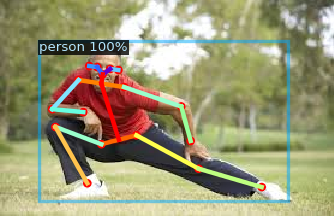

In [ ]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("balloon_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2  # This is the real "batch size" commonly known to deep learning people
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # The "RoIHead batch size". 128 is faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[09/02 02:36:56 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in

[09/02 02:37:00 d2.engine.train_loop]: Starting training from iteration 0
[09/02 02:37:24 d2.utils.events]:  eta: 0:05:22  iter: 19  total_loss: 1.986  loss_cls: 0.595  loss_box_reg: 0.549  loss_mask: 0.697  loss_rpn_cls: 0.03067  loss_rpn_loc: 0.01108  time: 1.1678  data_time: 0.0222  lr: 1.6068e-05  max_mem: 2725M
[09/02 02:37:48 d2.utils.events]:  eta: 0:05:14  iter: 39  total_loss: 1.872  loss_cls: 0.5049  loss_box_reg: 0.6145  loss_mask: 0.6069  loss_rpn_cls: 0.03091  loss_rpn_loc: 0.008448  time: 1.2048  data_time: 0.0108  lr: 3.2718e-05  max_mem: 2849M
[09/02 02:38:14 d2.utils.events]:  eta: 0:04:51  iter: 59  total_loss: 1.578  loss_cls: 0.4264  loss_box_reg: 0.6225  loss_mask: 0.4759  loss_rpn_cls: 0.03019  loss_rpn_loc: 0.008936  time: 1.2217  data_time: 0.0114  lr: 4.9367e-05  max_mem: 2849M
[09/02 02:38:39 d2.utils.events]:  eta: 0:04:28  iter: 79  total_loss: 1.468  loss_cls: 0.3577  loss_box_reg: 0.6923  loss_mask: 0.3745  loss_rpn_cls: 0.02136  loss_rpn_loc: 0.01085  tim

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("balloon_val", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "balloon_val")
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

[09/02 02:45:11 d2.evaluation.coco_evaluation]: 'balloon_val' is not registered by `register_coco_instances`. Therefore trying to convert it to COCO format ...
[09/02 02:45:11 d2.data.datasets.coco]: Converting annotations of dataset 'balloon_val' to COCO format ...)
[09/02 02:45:11 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[09/02 02:45:11 d2.data.datasets.coco]: Conversion finished, #images: 13, #annotations: 50
[09/02 02:45:11 d2.data.datasets.coco]: Caching COCO format annotations at './output/balloon_val_coco_format.json' ...
[09/02 02:45:12 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|  balloon   | 50           |
|            |              |
[09/02 02:45:12 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[09/02 02:45:12 d2.data.common]: Serializing 13 elements to

In [ ]:
for det_keypoints in outputs["instances"].pred_keypoints:
  person_keypoint={
  "nose":{'x':str(det_keypoints.cpu().numpy()[0][0]),'y': str(det_keypoints.cpu().numpy()[0][1]), 'conf': str(det_keypoints.cpu().numpy()[0][2])},
  "left_eye":{'x':str(det_keypoints.cpu().numpy()[1][0]),'y': str(det_keypoints.cpu().numpy()[1][1]), 'conf': str(det_keypoints.cpu().numpy()[1][2])},
  "right_eye":{'x':str(det_keypoints.cpu().numpy()[2][0]),'y': str(det_keypoints.cpu().numpy()[2][1]), 'conf': str(det_keypoints.cpu().numpy()[2][2])},
  "left_ear":{'x':str(det_keypoints.cpu().numpy()[3][0]),'y': str(det_keypoints.cpu().numpy()[3][1]), 'conf': str(det_keypoints.cpu().numpy()[3][2])},
  "right_ear":{'x':str(det_keypoints.cpu().numpy()[4][0]),'y': str(det_keypoints.cpu().numpy()[4][1]), 'conf': str(det_keypoints.cpu().numpy()[4][2])},
  "left_shoulder":{'x':str(det_keypoints.cpu().numpy()[5][0]),'y': str(det_keypoints.cpu().numpy()[5][1]), 'conf': str(det_keypoints.cpu().numpy()[5][2])},
  "right_shoulder":{'x':str(det_keypoints.cpu().numpy()[6][0]),'y': str(det_keypoints.cpu().numpy()[6][1]), 'conf': str(det_keypoints.cpu().numpy()[6][2])},
  "left_elbow":{'x':str(det_keypoints.cpu().numpy()[7][0]),'y': str(det_keypoints.cpu().numpy()[7][1]), 'conf': str(det_keypoints.cpu().numpy()[7][2])},
  "right_elbow":{'x':str(det_keypoints.cpu().numpy()[8][0]),'y': str(det_keypoints.cpu().numpy()[8][1]), 'conf': str(det_keypoints.cpu().numpy()[8][2])},
  "left_wrist":{'x':str(det_keypoints.cpu().numpy()[9][0]),'y': str(det_keypoints.cpu().numpy()[9][1]), 'conf': str(det_keypoints.cpu().numpy()[9][2])},
  "right_wrist":{'x':str(det_keypoints.cpu().numpy()[10][0]),'y': str(det_keypoints.cpu().numpy()[10][1]), 'conf': str(det_keypoints.cpu().numpy()[10][2])},
  "left_hip":{'x':str(det_keypoints.cpu().numpy()[11][0]),'y': str(det_keypoints.cpu().numpy()[11][1]), 'conf': str(det_keypoints.cpu().numpy()[11][2])},
  "right_hip":{'x':str(det_keypoints.cpu().numpy()[12][0]),'y': str(det_keypoints.cpu().numpy()[12][1]), 'conf': str(det_keypoints.cpu().numpy()[12][2])},
  "left_knee":{'x':str(det_keypoints.cpu().numpy()[13][0]),'y': str(det_keypoints.cpu().numpy()[13][1]), 'conf': str(det_keypoints.cpu().numpy()[13][2])},
  "right_knee":{'x':str(det_keypoints.cpu().numpy()[14][0]),'y': str(det_keypoints.cpu().numpy()[14][1]), 'conf': str(det_keypoints.cpu().numpy()[14][2])},
  "left_ankle":{'x':str(det_keypoints.cpu().numpy()[15][0]),'y': str(det_keypoints.cpu().numpy()[15][1]), 'conf': str(det_keypoints.cpu().numpy()[15][2])},
  "right_ankle":{'x':str(det_keypoints.cpu().numpy()[16][0]),'y': str(det_keypoints.cpu().numpy()[16][1]), 'conf': str(det_keypoints.cpu().numpy()[16][2])}
  }

In [ ]:
person_keypoint

{'nose': {'x': '85.56388', 'y': '61.977654', 'conf': '1.4834962'},
 'left_eye': {'x': '91.86076', 'y': '57.484108', 'conf': '5.702141'},
 'right_eye': {'x': '81.06611', 'y': '55.911366', 'conf': '11.145456'},
 'left_ear': {'x': '98.60743', 'y': '58.382816', 'conf': '1.3229614'},
 'right_ear': {'x': '74.31944', 'y': '55.012657', 'conf': '1.325198'},
 'left_shoulder': {'x': '103.33009', 'y': '72.53749', 'conf': '0.5963342'},
 'right_shoulder': {'x': '65.54878', 'y': '66.695885', 'conf': '0.4178645'},
 'left_elbow': {'x': '151.00652', 'y': '88.71426', 'conf': '1.1803579'},
 'right_elbow': {'x': '43.509678', 'y': '90.96103', 'conf': '1.0881624'},
 'left_wrist': {'x': '158.87762', 'y': '117.47296', 'conf': '1.6337507'},
 'right_wrist': {'x': '69.37189', 'y': '93.43248', 'conf': '1.6314237'},
 'left_hip': {'x': '113.67498', 'y': '112.75473', 'conf': '0.25009555'},
 'right_hip': {'x': '84.43943', 'y': '120.16908', 'conf': '0.19456294'},
 'left_knee': {'x': '165.62428', 'y': '140.61472', 'conf

**Keypoint-RCNN**

---



In [ ]:
import torch
import torchvision
from torchvision import transforms as T
import matplotlib.pyplot as plt
import cv2

In [ ]:
model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=True)
model.eval()

In [ ]:
keypoints = ['nose','left_eye','right_eye',\
'left_ear','right_ear','left_shoulder',\
'right_shoulder','left_elbow','right_elbow',\
'left_wrist','right_wrist','left_hip',\
'right_hip','left_knee', 'right_knee', \
'left_ankle','right_ankle']

In [ ]:
img_path ="/content/position1.jpeg"
img = cv2.imread(img_path)

In [ ]:
transform = T.Compose([T.ToTensor()])
img_tensor = transform(img)

In [ ]:
output = model([img_tensor])[0]

In [ ]:
output

{'boxes': tensor([[ 39.5660,  32.2340, 178.4719, 149.9319],
         [ 49.3399,  52.2164, 242.6333, 168.6493],
         [230.8805,  13.0502, 254.0858,  65.5054],
         [133.5355,  79.7238, 242.2218, 167.7296],
         [ 35.1713,  32.4815, 110.8200, 155.1687]], grad_fn=<StackBackward0>),
 'labels': tensor([1, 1, 1, 1, 1]),
 'scores': tensor([0.9949, 0.6941, 0.3787, 0.1544, 0.0507], grad_fn=<IndexBackward0>),
 'keypoints': tensor([[[ 86.2051,  61.5462,   1.0000],
          [ 91.5995,  57.0539,   1.0000],
          [ 81.4850,  55.4816,   1.0000],
          [ 97.4434,  59.0754,   1.0000],
          [ 74.9668,  55.2570,   1.0000],
          [104.8607,  71.8784,   1.0000],
          [ 64.8522,  66.0385,   1.0000],
          [150.9379,  89.1737,   1.0000],
          [ 46.6461,  88.7245,   1.0000],
          [159.9286, 120.6198,   1.0000],
          [ 71.5952,  97.9337,   1.0000],
          [114.5257, 115.9029,   1.0000],
          [ 85.5308, 120.6198,   1.0000],
          [161.2772, 136.7

In [ ]:

limbs = [       
        [keypoints.index('right_eye'), keypoints.index('nose')],
        [keypoints.index('right_eye'), keypoints.index('right_ear')],
        [keypoints.index('left_eye'), keypoints.index('nose')],
        [keypoints.index('left_eye'), keypoints.index('left_ear')],
        [keypoints.index('right_shoulder'), keypoints.index('right_elbow')],
        [keypoints.index('right_elbow'), keypoints.index('right_wrist')],
        [keypoints.index('left_shoulder'), keypoints.index('left_elbow')],
        [keypoints.index('left_elbow'), keypoints.index('left_wrist')],
        [keypoints.index('right_hip'), keypoints.index('right_knee')],
        [keypoints.index('right_knee'), keypoints.index('right_ankle')],
        [keypoints.index('left_hip'), keypoints.index('left_knee')],
        [keypoints.index('left_knee'), keypoints.index('left_ankle')],
        [keypoints.index('right_shoulder'), keypoints.index('left_shoulder')],
        [keypoints.index('right_hip'), keypoints.index('left_hip')],
        [keypoints.index('right_shoulder'), keypoints.index('right_hip')],
        [keypoints.index('left_shoulder'), keypoints.index('left_hip')]
]

In [ ]:
def draw_skeleton_per_person(img, all_keypoints, all_scores, confs, keypoint_threshold=2, conf_threshold=0.9):
     
    # initialize a set of colors from the rainbow spectrum
    cmap = plt.get_cmap('rainbow')
    # create a copy of the image
    img_copy = img.copy()
    # check if the keypoints are detected
    if len(output["keypoints"])>0:
      # pick a set of N color-ids from the spectrum
      colors = np.arange(1,255, 255//len(all_keypoints)).tolist()[::-1]
      # iterate for every person detected
      for person_id in range(len(all_keypoints)):
          # check the confidence score of the detected person
          if confs[person_id]>conf_threshold:
            # grab the keypoint-locations for the detected person
            keypoints = all_keypoints[person_id, ...]
 
            # iterate for every limb 
            for limb_id in range(len(limbs)):
              # pick the start-point of the limb
              limb_loc1 = keypoints[limbs[limb_id][0], :2].detach().numpy().astype(np.int32)
              # pick the start-point of the limb
              limb_loc2 = keypoints[limbs[limb_id][1], :2].detach().numpy().astype(np.int32)
              # consider limb-confidence score as the minimum keypoint score among the two keypoint scores
              limb_score = min(all_scores[person_id, limbs[limb_id][0]], all_scores[person_id, limbs[limb_id][1]])
              # check if limb-score is greater than threshold
              if limb_score> keypoint_threshold:
                # pick the color at a specific color-id
                color = tuple(np.asarray(cmap(colors[person_id])[:-1])*255)
                # draw the line for the limb
                cv2.line(img_copy, tuple(limb_loc1), tuple(limb_loc2), color, 25)
 
  

**MediaPipe:**

In [ ]:
!pip install -q mediapipe==0.10.0
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 24.7 MB/s eta 0:00:00


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/position1.jpeg")


In [ ]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

In [ ]:
def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)


  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

   
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

In [ ]:
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

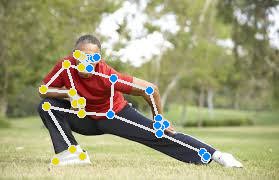

In [ ]:

image = mp.Image.create_from_file("/content/position1.jpeg")


detection_result = detector.detect(image)

annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))